# Diabetes Classification

The goal for this project is to predict whether or not a female of at least 21 years olf of Pima Indian heritage have diabetes or not using multiple machine learning models. 

- The source of this data is from [Kaggle](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). 
- The original data is  from the National Institute of Diabetes and Digestive and Kidney Diseases. Various diagnostic measurements were used to determine whether the patient have diabetes. 
- All patients in this dataset are females that is at least 21 years old of Pima Indian heritage.  

The features are as following:  
- Pregnancies: Number of times pregnant  
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
- BloodPressure: Diastolic blood pressure (mm Hg)  
- SkinThickness: Triceps skin fold thickness (mm)  
- Insulin: 2-Hour serum insulin (mu U/ml)  
- BMI: Body mass index (weight in kg/(height in m)^2)  
- DiabetesPedigreeFunction: Diabetes pedigree function  
- Age: Age (years)  

The predictor:  
- Outcome: Either 1 - has diabetes or 0- does not have diabetes

In [1628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1629]:
#import dataset
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [1630]:
#data information & shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

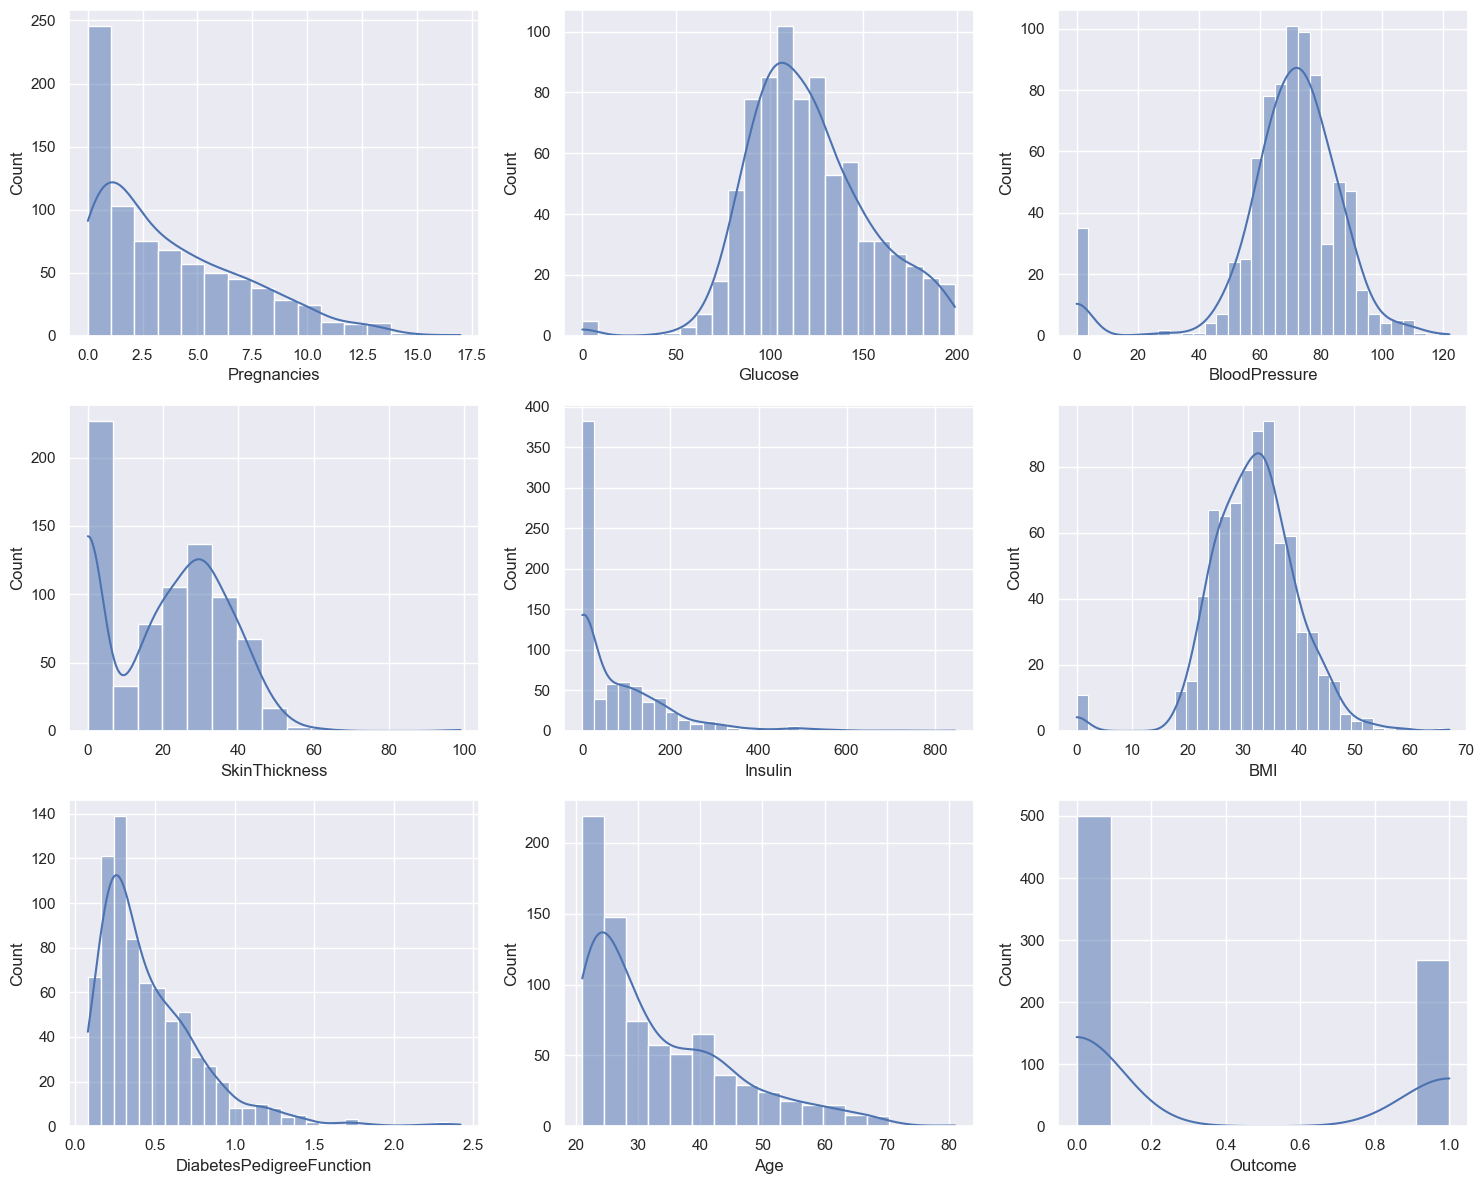

In [1530]:
# Visualizing each features
plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

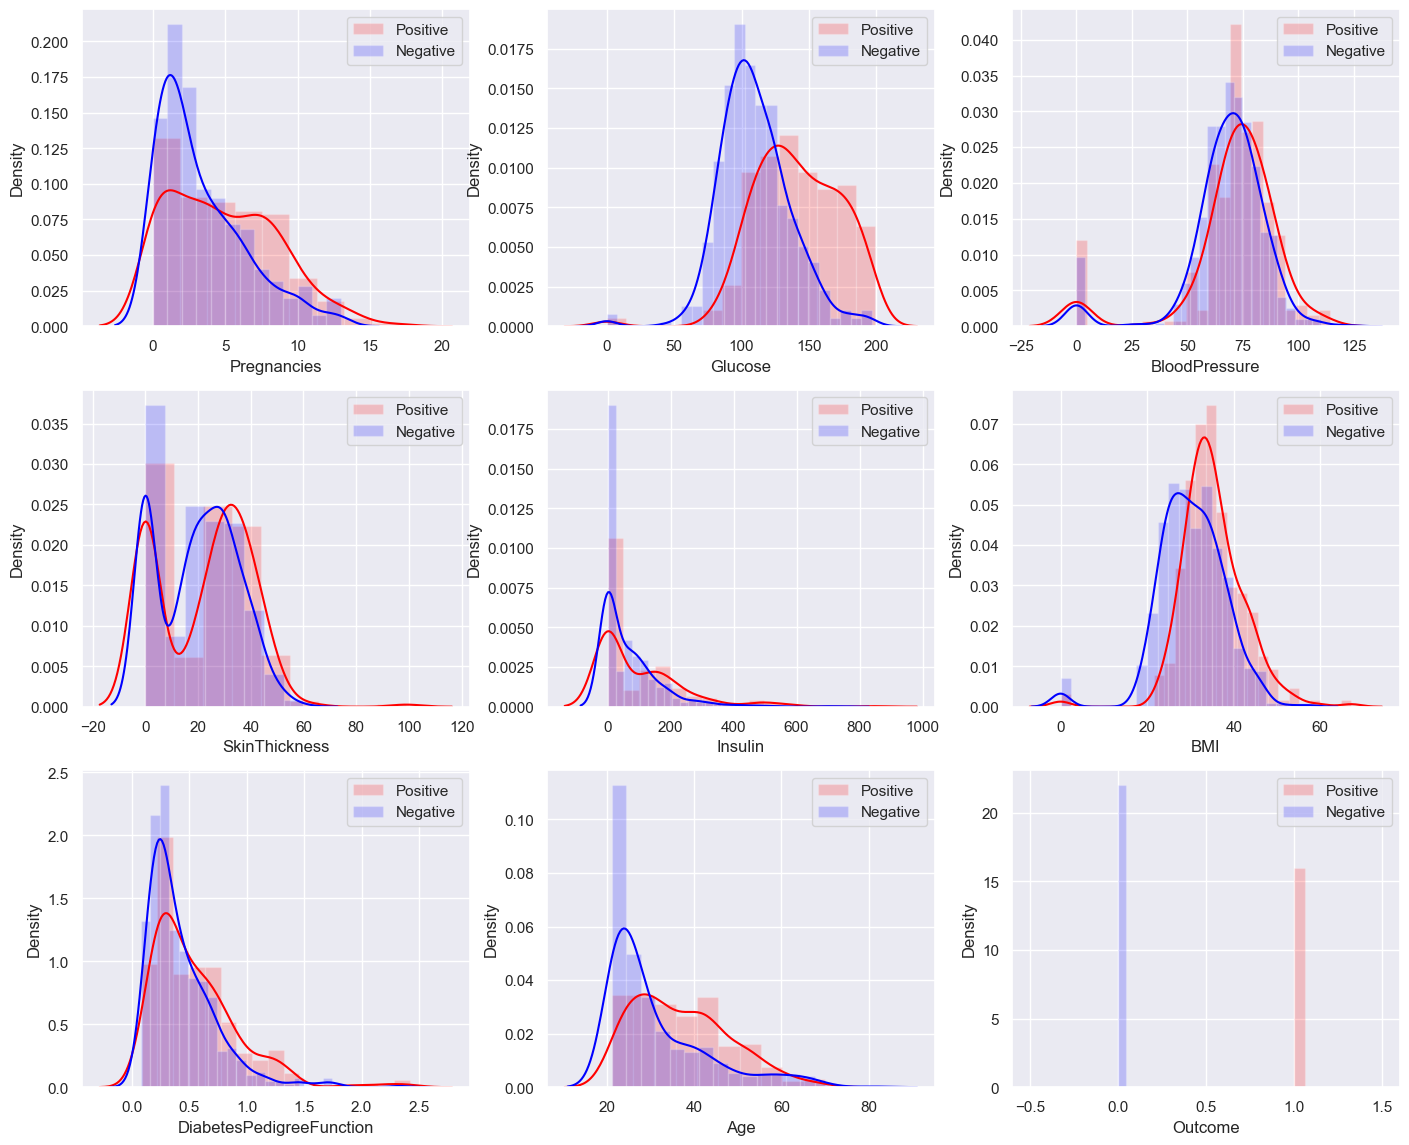

In [1531]:
plt.figure(figsize=(17,14))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.distplot(df.query("Outcome==1")[col],kde=True, 
                 color='red', hist_kws=dict(alpha=0.2), label='Positive')
    sns.distplot(df.query("Outcome==0")[col],kde=True, 
             color='blue', hist_kws=dict(alpha=0.2), label='Negative')
    plt.legend()

In [1532]:
# Statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Data Observation

1. Glucose, BloodPressure, BMI, SkinThickness and Insulin include noticable amount of 0 values, which might represent missing data.
2. The data set is imbalanced with more diabetes negatives than diabetes positive. Confusion matrix should be used to evaluate the results to get insights of correct and incorrect prediction.
3. The features are rather skewed than normally distributed; hence, median should be used to impute missing values, and MinMaxScaler should be used instead of StandardScaler. 

## Data Preprocessing

In [1533]:
# Check for native & non-native null
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

Pregnancies 0 0
Glucose 0 0
BloodPressure 0 0
SkinThickness 0 0
Insulin 0 0
BMI 0 0
DiabetesPedigreeFunction 0 0
Age 0 0
Outcome 0 0


In [1534]:
# Check for 0 values in columns where 0 is not meaningful including: Glucose, BloodPressure, SkinThickness, 
# Insulin, BMI
features_to_impute = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]
(features_to_impute==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [1535]:
# Replace 0 values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

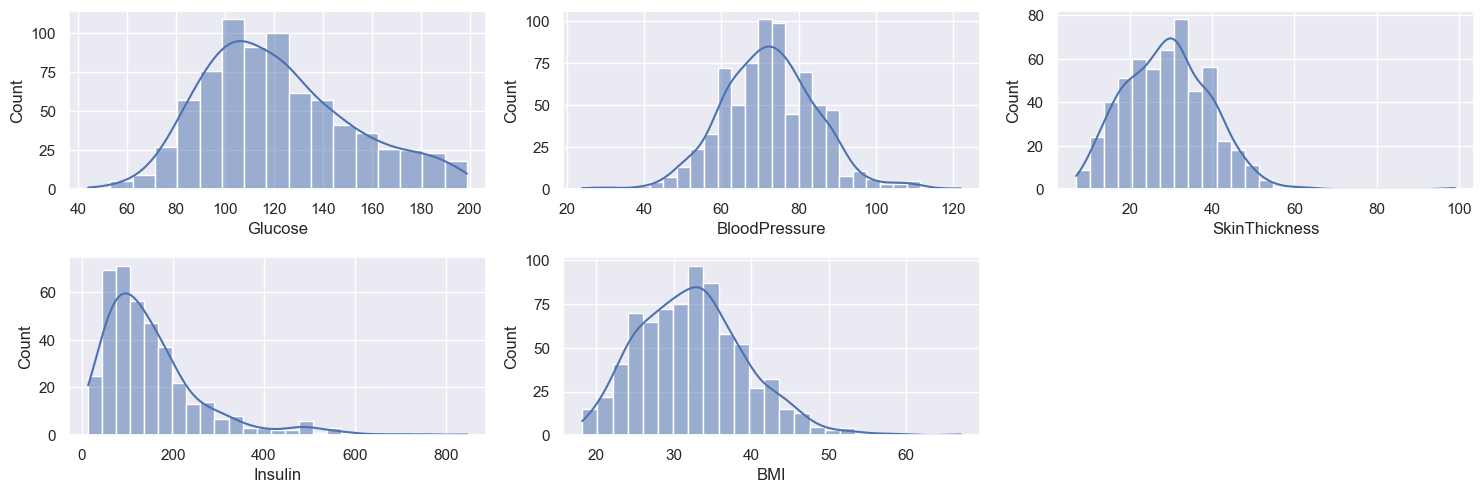

In [1536]:
# Histogram of features to impute, excluding 0 values
plt.figure(figsize=(15,12))
for i,col in enumerate(features_to_impute[features_to_impute >0].columns,1):
    plt.subplot(5,3,i)
    sns.histplot(features_to_impute[features_to_impute >0][col],kde=True)
    plt.tight_layout()
    plt.plot()

In [1537]:
for i in features_to_impute.columns:
    print(i, ":", shapiro(features_to_impute[col]))

Glucose : ShapiroResult(statistic=0.9499890208244324, pvalue=1.8407586602041262e-15)
BloodPressure : ShapiroResult(statistic=0.9499890208244324, pvalue=1.8407586602041262e-15)
SkinThickness : ShapiroResult(statistic=0.9499890208244324, pvalue=1.8407586602041262e-15)
Insulin : ShapiroResult(statistic=0.9499890208244324, pvalue=1.8407586602041262e-15)
BMI : ShapiroResult(statistic=0.9499890208244324, pvalue=1.8407586602041262e-15)


After performing Shapiro-Wilk Test, it is confirmed that none of the features come from a normally distributed population, hence I will impute the NaN data with median values.

In [1631]:
# Impute NaN with median values
df["Glucose"]= df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"]= df["BloodPressure"].fillna(df["BloodPressure"].median())
df["SkinThickness"]= df["SkinThickness"].fillna(df["SkinThickness"].median())
df["Insulin"]= df["Insulin"].fillna(df["Insulin"].median())
df["BMI"]= df["BMI"].fillna(df["BMI"].median())

<AxesSubplot:title={'center':'Diabetes Heat Map'}>

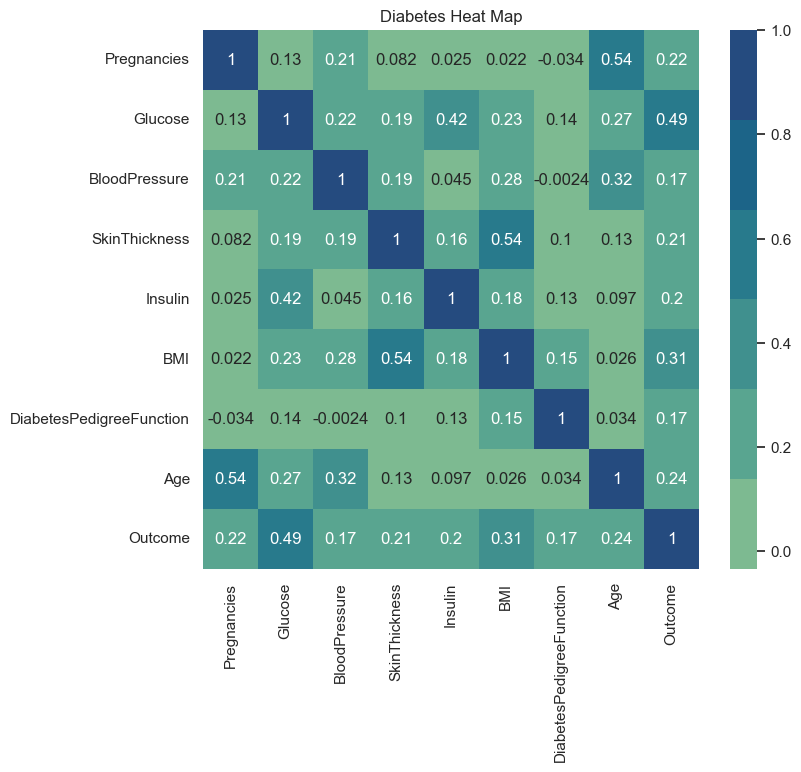

In [1539]:
# Visualize the Correlation between variables
plt.figure (figsize = [8,7])
plt.title("Diabetes Heat Map")
cmap=sns.color_palette("crest")
sns.heatmap(df.corr(), annot=True, cmap=cmap)

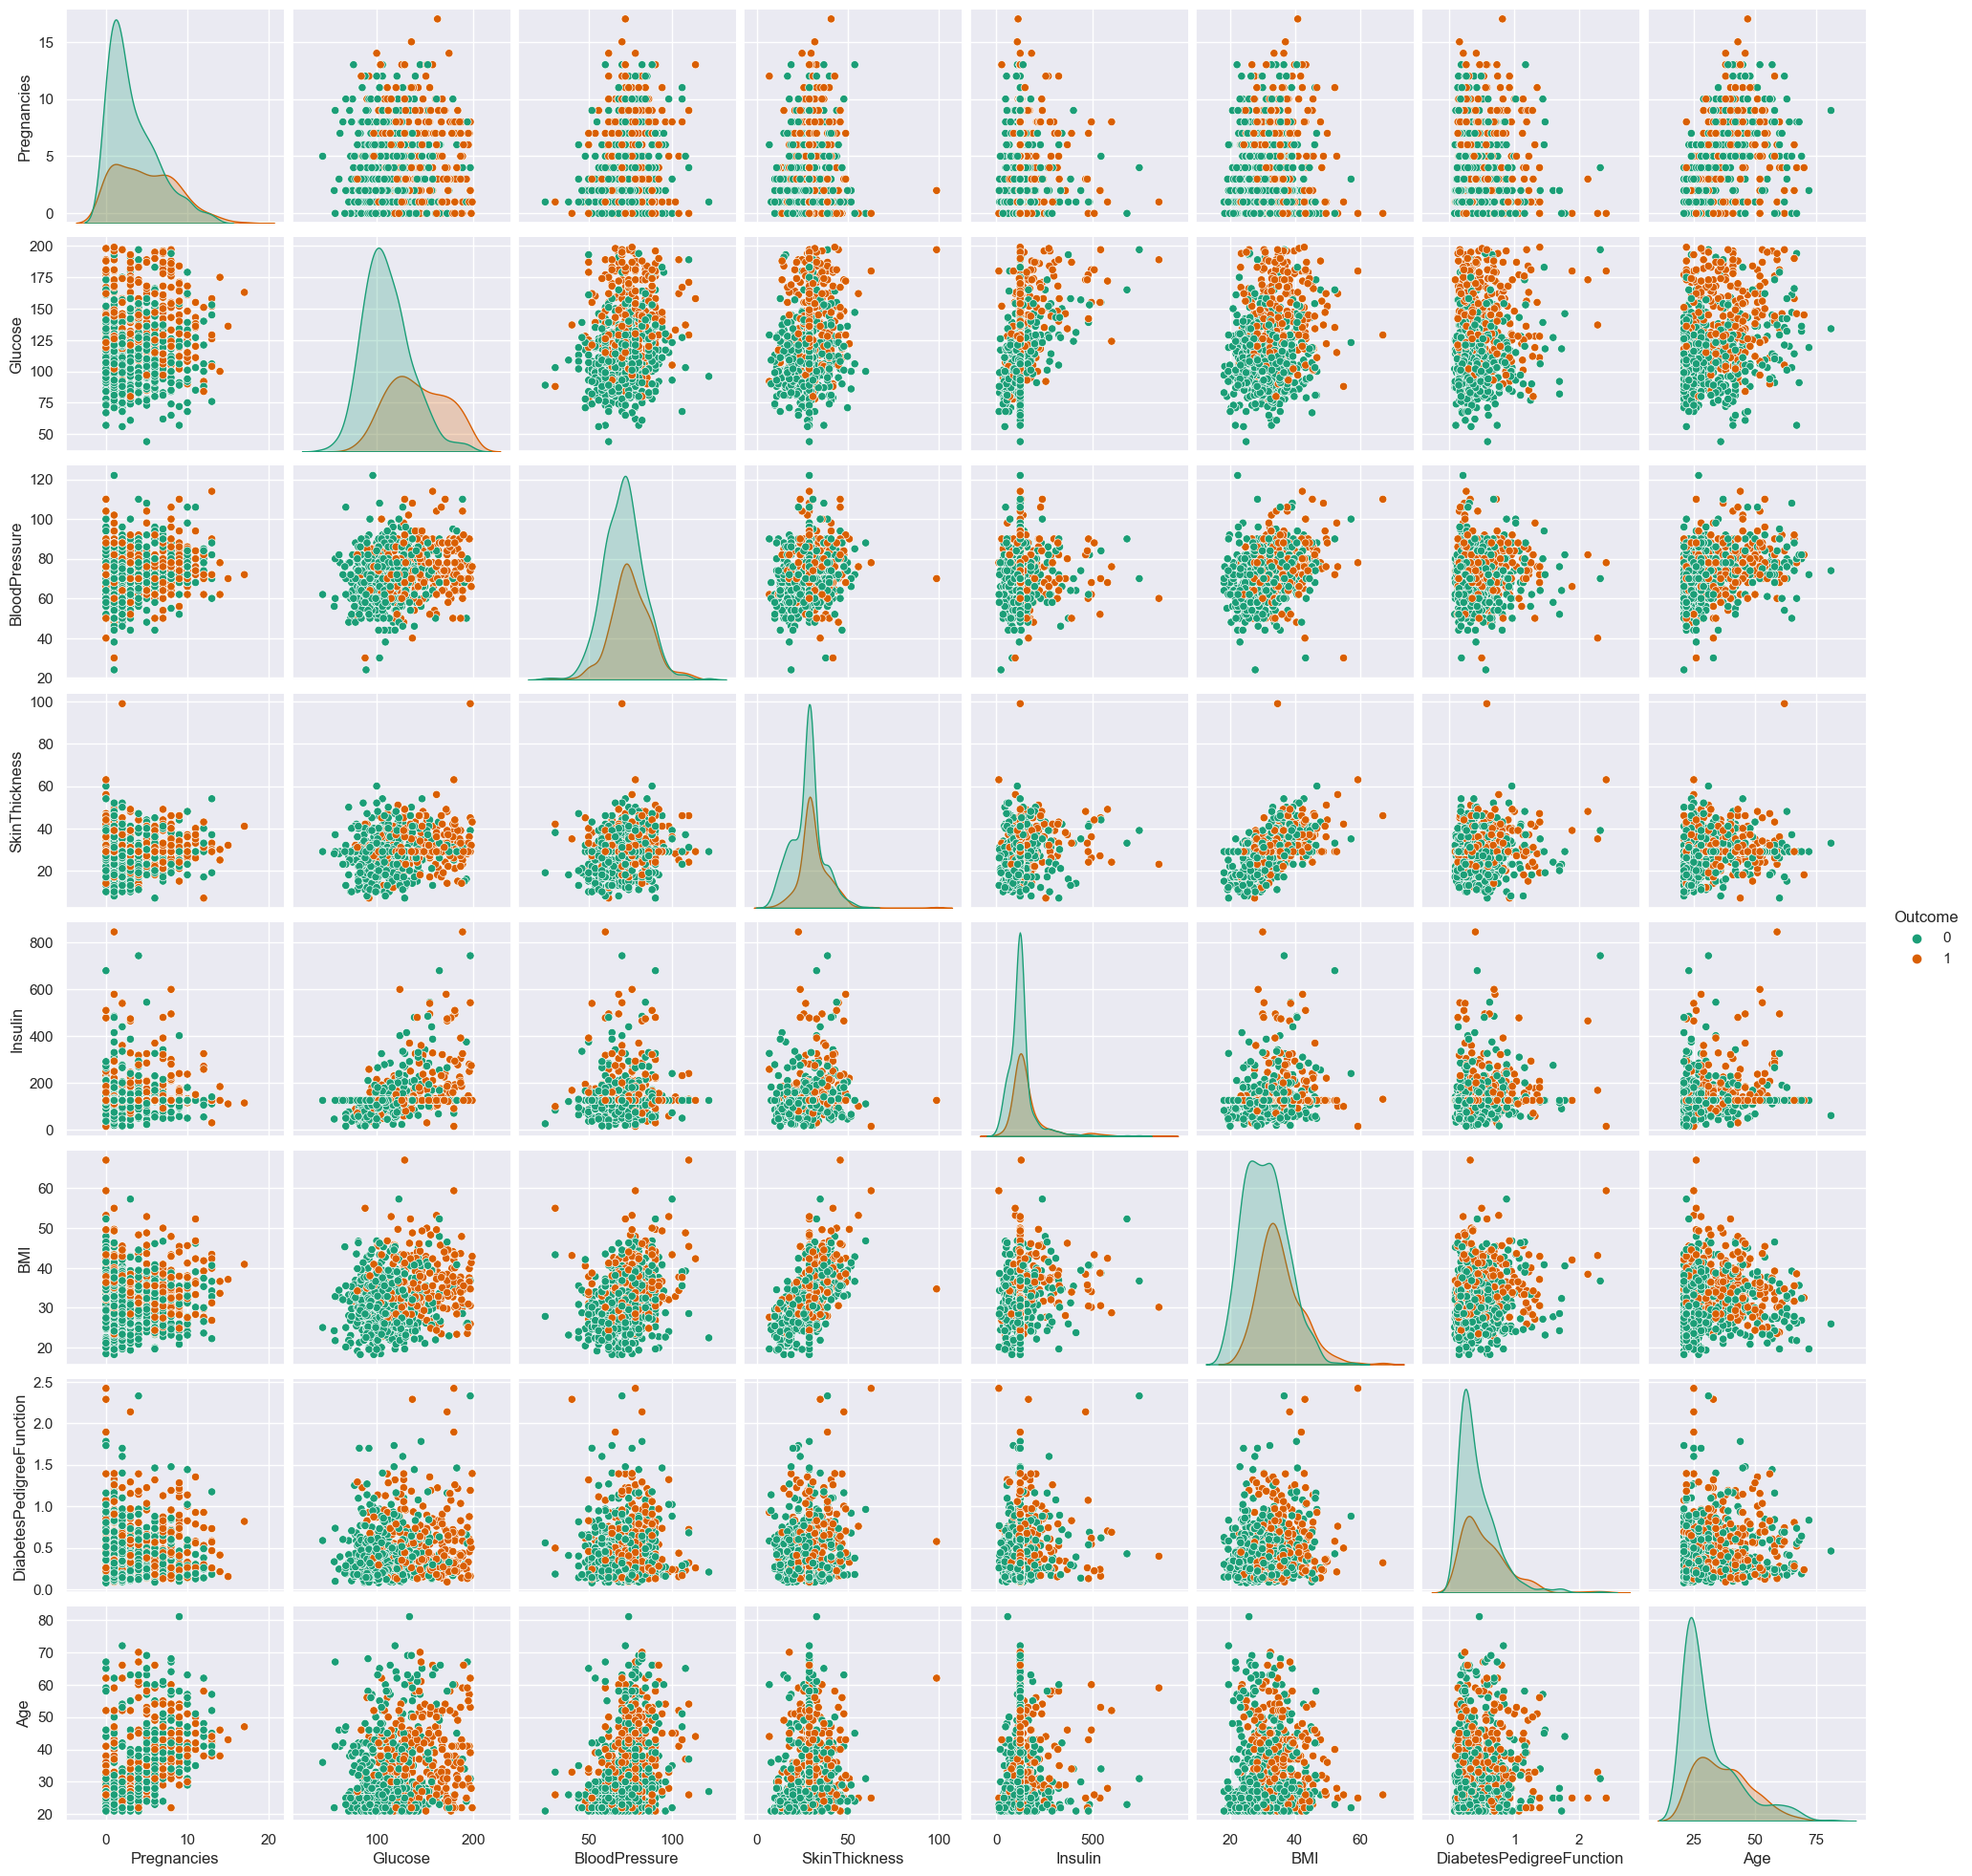

In [1540]:
sns.pairplot(df, hue="Outcome", palette='Dark2')
plt.show()

## Data Modelling

I will be using Logistic Regression, KNN, Random Forest, and SVC to train the model.

In [1541]:
# import library for data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [1616]:
def roc_curve(model):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.figure(figsize = (7,4))
    plt.plot(fpr, tpr, color='darkblue', label="AUC="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(str(model)+'ROC')
    plt.legend()
    plt.show()

In [1635]:
# Extract test & train data
X= df.drop('Outcome', axis=1).values
y=df['Outcome'].values

In [1636]:
# Feature scaling
scaler = MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(df.iloc[:, :8]))

X= X.values
y= df["Outcome"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [1545]:
def results(y_test, y_pred):
    print("accuracy score: ", accuracy_score(y_test, y_pred))

#### Logistic Regression

In [1640]:
model_acc_score= []
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred=LogReg.predict(X_test)

results(y_test, LogReg_pred)

accuracy score:  0.7662337662337663


#### KNN

In [1641]:
KNN= KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred=KNN.predict(X_test)

results(y_test,KNN_pred)

accuracy score:  0.6948051948051948


#### Random Forest

In [1642]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred=RF.predict(X_test)

results(y_test,RF_pred)

accuracy score:  0.7532467532467533


#### SVC

In [1643]:
#SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)


results(y_test,svc_pred)

accuracy score:  0.7662337662337663


## Tuning Hyperparameters

#### KNN

In [1646]:
acc_score= []
for i in range(1, 25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score=knn.score(X_test, y_test)
    train_score=knn.score(X_train, y_train)
    acc_score.append((i, test_score, train_score))
acc_df=pd.DataFrame(acc_score, columns=["K", "Test Score", "Train Score"])

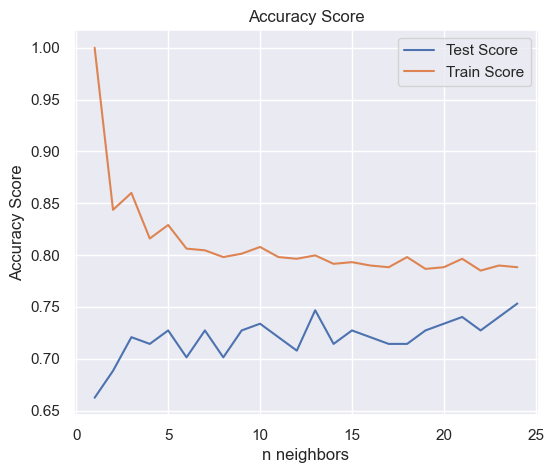

In [1551]:
plt.figure(figsize=(6,5))
plt.plot(acc_df["K"], acc_df["Test Score"], label="Test Score")
plt.plot(acc_df["K"], acc_df["Train Score"], label="Train Score")
plt.xlabel("n neighbors")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score")
plt.legend()
plt.show()

In [1576]:
KNN= KNeighborsClassifier(n_neighbors=24)
KNN.fit(X_train, y_train)
KNN_pred=KNN.predict(X_test)

accuracy_score(y_test,KNN_pred)
#Accuracy score improved after tuning n_neighbors

0.7532467532467533

#### Random Forest

In [1553]:
param_grid = {'n_estimators': range(100,2000,100),
               'criterion': ['gini', 'entropy', 'log_loss'],
               'max_features': ['sqrt', 'log2','auto'],
               'max_depth': range(1,20,1),
               'min_samples_split': range(2,10,1),
               'min_samples_leaf': range(1,10,1)}
grid_search=RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, 
                               cv=5, verbose=3, n_jobs=-1, n_iter = 400)

In [1554]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'n_estimators': 1400, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 13, 'criterion': 'entropy'}
0.7753165400506463


In [1647]:
RF=RandomForestClassifier(n_estimators=100, min_samples_split=5,min_samples_leaf=4,max_features='auto', 
                          max_depth=10, criterion='gini' )
RF.fit(X_train, y_train)
RF_pred= grid.predict(X_test)

#### SVC

In [1556]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

In [1648]:
svc= SVC(C=10, gamma=1, kernel='poly', probability=True)
svc.fit(X_train, y_train)
SVC_pred= grid.predict(X_test)

## Evaluation

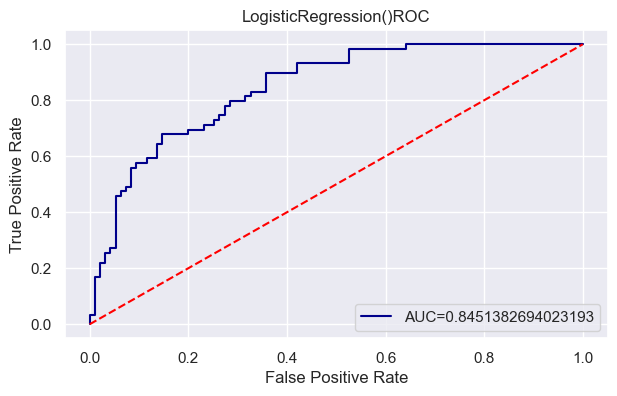

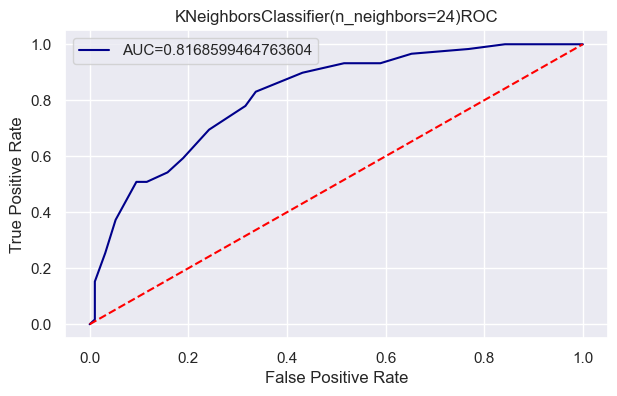

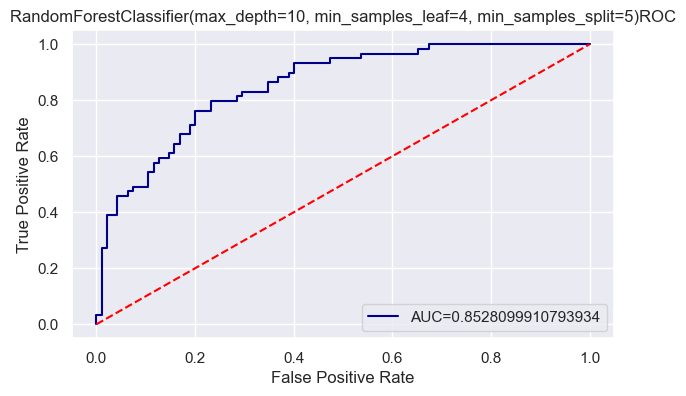

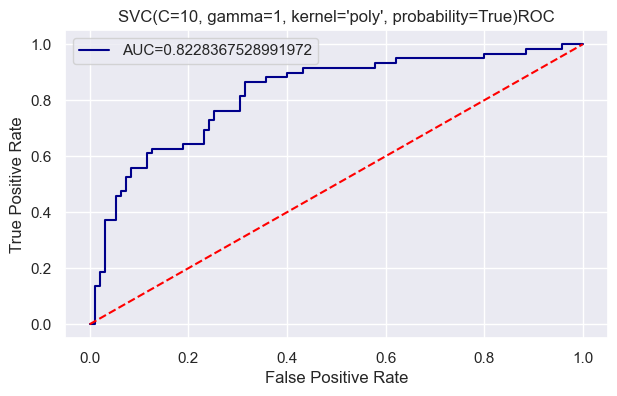

In [1619]:
# ROC curve of all the models
model=[LogReg, KNN, RF, svc]

for i in model:
    roc_curve(i)

Text(29.75, 0.5, 'Actuals')

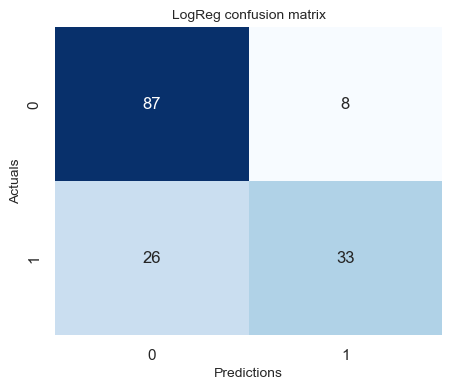

In [1620]:
LogReg_cm=confusion_matrix(y_test,LogReg_pred)
plt.figure (figsize = [5,4])
plt.title("LogReg confusion matrix", fontsize = 10)
sns.heatmap(LogReg_cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)

In [1621]:
print(confusion_matrix(y_test,LogReg_pred))
print(classification_report(y_test,LogReg_pred))

[[87  8]
 [26 33]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        95
           1       0.80      0.56      0.66        59

    accuracy                           0.78       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



Text(29.75, 0.5, 'Actuals')

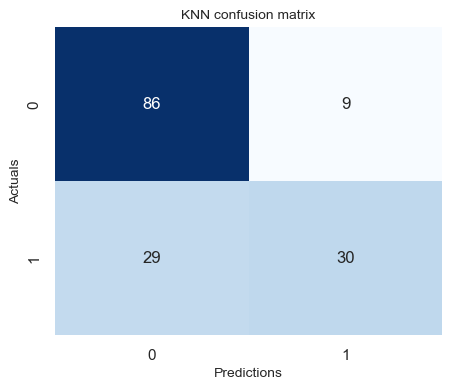

In [1622]:
KNN_cm=confusion_matrix(y_test,KNN_pred)
plt.figure (figsize = [5,4])
plt.title("KNN confusion matrix", fontsize = 10)
sns.heatmap(KNN_cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)

In [1623]:
print(confusion_matrix(y_test,KNN_pred))
print(classification_report(y_test,KNN_pred))

[[86  9]
 [29 30]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.77      0.51      0.61        59

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154



Text(29.75, 0.5, 'Actuals')

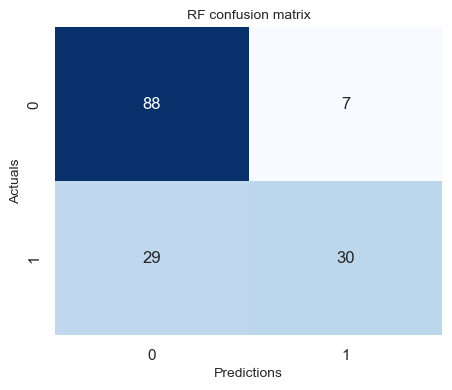

In [1624]:
RF_cm=confusion_matrix(y_test,RF_pred)
plt.figure (figsize = [5,4])
plt.title("RF confusion matrix", fontsize = 10)
sns.heatmap(RF_cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)

In [1625]:
print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))

[[88  7]
 [29 30]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



Text(29.75, 0.5, 'Actuals')

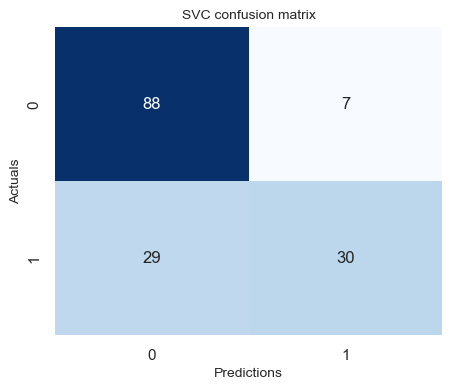

In [1626]:
SVC_cm=confusion_matrix(y_test,SVC_pred)
plt.figure (figsize = [5,4])
plt.title("SVC confusion matrix", fontsize = 10)
sns.heatmap(SVC_cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)

In [1566]:
print(confusion_matrix(y_test,SVC_pred))
print(classification_report(y_test,SVC_pred))

[[88  7]
 [29 30]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



## Conclusion

Since this dataset is imbalanced with more diabetes-negative data than diabetes-positive data, the confusion matrix produce more false negative than false positive, which is more dangerous in diagnosing diabetes for patients as the disease go undiagnosed. To make predictions more accurate, we can fix the imbalanced dataset problem by resampling the data to either oversampling or undersampling the data to minimized bias. It is more important to look at precision, recall, f1-score, and AUC score than accuracy to determine wheter the models are good. The AUC for random forest scores 85.28% which is the best out of the 4 models, follows by logistic regression with 84.51%. Moreover, logistic regression model produces the best accuracy, precision, recall, and f1-score out of the 4 models.